# Exploratory data analysis (EDA)

En este apartado, realizare un analisis de los datasets ya procesados con el proposito de recopilar informacion de interes.

Aplicare **estadisticas descriptivas** sobre los datasets asi como ver la **correlacion** entre sus datos. Tambien realizare tratamiento de valores **outliers**.


🔎Asegúrate de instalar la biblioteca de matplotlib

Para instalar esta biblioteca debes abrir una terminal o ventana de línea de comandos y ejecutar el siguiente comando:

<span style="background-color: #f2f2f2; color: black;">pip install matplotlib</span>

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt#---> La usaremos para visualizar nuestros datos de una manera mas eficiente 

In [2]:
#Leemos los archvios PARQUET con pandas
df_user_reviews = pd.read_parquet('C:\\Users\\Juampi\\Desktop\\Henry\\PI_MLOps\\Datasets\\archivos_procesados\\user_reviews_cleaned.parquet')

df_users_items = pd.read_parquet('C:\\Users\\Juampi\\Desktop\\Henry\\PI_MLOps\\Datasets\\archivos_procesados\\users_items_cleaned.parquet')

df_steam_games = pd.read_parquet('C:\\Users\\Juampi\\Desktop\\Henry\\PI_MLOps\\Datasets\\archivos_procesados\\steam_games_cleaned.parquet')

In [3]:
df_steam_games

,genres,name,price,item_id,developer,release_year
0,"[Strategy, Action, Indie, Casual, Simulation]",Lost Summoner Kitty,4.99,761140.0,Kotoshiro,2018
1,"[Free to Play, Strategy, Indie, RPG]",Ironbound,0.00,643980.0,Secret Level SRL,2018
2,"[Free to Play, Simulation, Sports, Casual, Indie]",Real Pool 3D - Poolians,0.00,670290.0,Poolians.com,2017
3,"[Action, Adventure, Casual]",弹炸人2222,0.99,767400.0,彼岸领域,2017
4,"[Action, Indie, Casual, Sports]",Log Challenge,2.99,773570.0,None,<NA>
...,...,...,...,...,...,...
32130,"[Strategy, Indie, Casual, Simulation]",Colony On Mars,1.99,773640.0,"Nikita ""Ghost_RUS""",2018
32131,"[Strategy, Indie, Casual]",LOGistICAL: South Africa,4.99,733530.0,Sacada,2018
32132,"[Indie, Simulation, Racing]",Russian Roads,1.99,610660.0,Laush Dmitriy Sergeevich,2018
32133,"[Indie, Casual]",EXIT 2 - Directions,4.99,658870.0,"xropi,stev3ns",2017


# Variable **release_year** (cuantitativa), **price** (cuantitativa) y **genres** (categorica).

Se estaran utilizando para cantidad de items y porcentaje de contenido Free por año según empresa desarrolladora, y cantidad de dinero gastado por el usuario.

In [4]:
df_steam_games.describe()

,price,item_id,release_year
count,32133.00000,3.213300e+04,29782.0
mean,8.48619,4.517574e+05,2014.759251
std,15.66249,1.827140e+05,3.508234
min,0.00000,1.000000e+01,1970.0
25%,1.99000,3.292800e+05,2014.0
50%,4.99000,4.520600e+05,2016.0
75%,9.99000,5.934000e+05,2017.0
max,995.00000,2.028850e+06,2021.0


In [5]:
df_steam_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32133 entries, 0 to 32134
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genres        31995 non-null  object 
 1   name          32132 non-null  object 
 2   price         32133 non-null  float64
 3   item_id       32133 non-null  float64
 4   developer     28900 non-null  object 
 5   release_year  29782 non-null  Int64  
dtypes: Int64(1), float64(2), object(3)
memory usage: 1.7+ MB


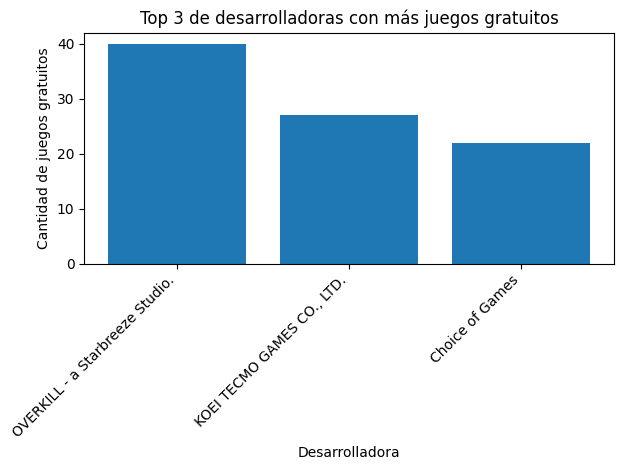

In [6]:

# Filtrar los juegos gratuitos
free_games = df_steam_games[df_steam_games['price'] == 0]

# Contar cuántos juegos gratuitos tiene cada desarrolladora
developer_free_games_count = free_games['developer'].value_counts()

# Seleccionar las tres desarrolladoras con más juegos gratuitos
top_developers = developer_free_games_count.head(3)

# Graficar el top 3 de desarrolladoras con más juegos gratuitos
plt.bar(top_developers.index, top_developers.values)
plt.xlabel('Desarrolladora')
plt.ylabel('Cantidad de juegos gratuitos')
plt.title('Top 3 de desarrolladoras con más juegos gratuitos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


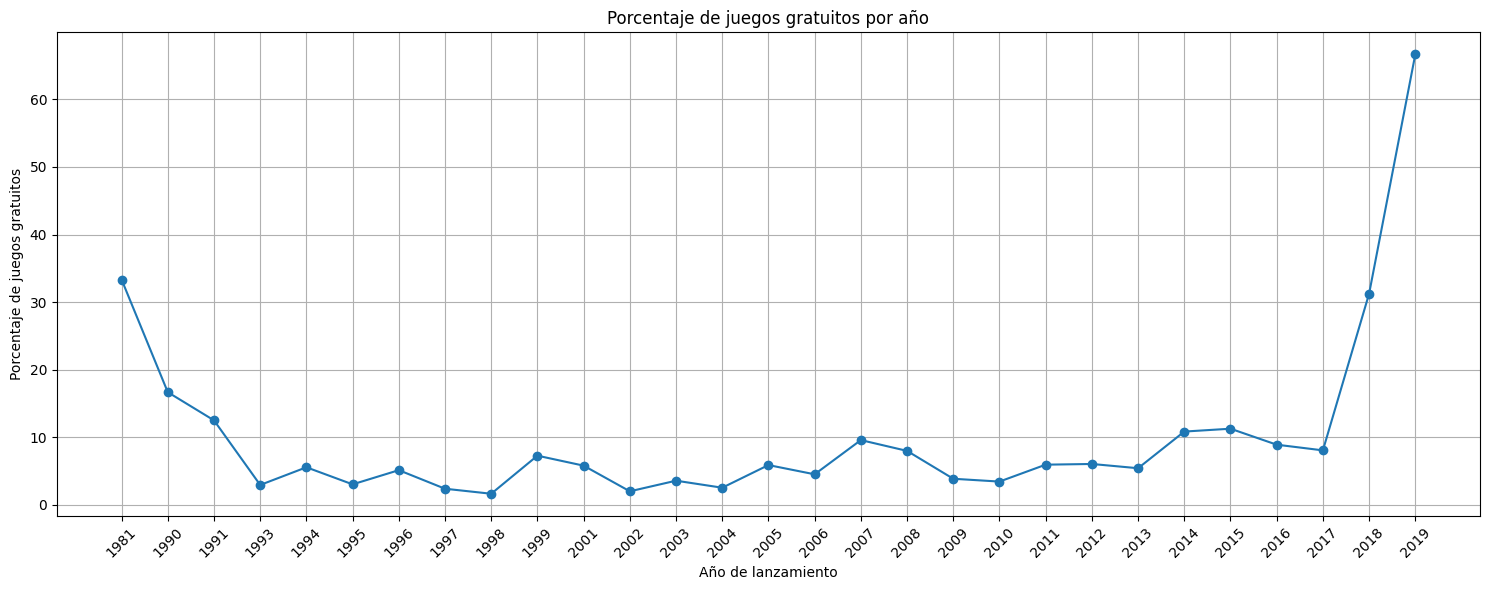

In [7]:
# Calcular el total de juegos
total_games = len(df_steam_games)

# Filtrar los juegos gratuitos
free_games = df_steam_games[df_steam_games['price'] == 0.0000]

# Contar la cantidad de juegos gratuitos
total_free_games = len(free_games)

# Calcular el porcentaje de juegos gratuitos
percentage_free_games = (total_free_games / total_games) * 100

# Graficar el porcentaje de juegos gratuitos por año
plt.figure(figsize=(15,6))
percentage_free_games_by_year = (free_games['release_year'].value_counts() / df_steam_games['release_year'].value_counts()) * 100
percentage_free_games_by_year = percentage_free_games_by_year.dropna().sort_index()
plt.plot(percentage_free_games_by_year.index.astype(str), percentage_free_games_by_year.values, marker='o')
plt.xlabel('Año de lanzamiento')
plt.ylabel('Porcentaje de juegos gratuitos')
plt.title('Porcentaje de juegos gratuitos por año')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

Se observa un gran aumento en el porcentaje de juegos gratuitos en los ultimos anios, pasando del 8-10% en 2017 a mas del 60% en 2019.

Esto podria deberse al creciente interes que hay en la industria, que trae consigo muchas desarrolladoras independientes buscando entrar en el mercado.

In [8]:
df_user_reviews

,item_id,recommend,year,language,sentiment_analysis
5331,10,True,2011,en,2
45506,10,True,2013,en,1
7801,10,True,2014,en,2
7967,10,True,2014,en,2
8519,10,True,2014,en,2
...,...,...,...,...,...
51725,99900,True,2015,en,2
53065,99900,False,2015,en,2
12393,99910,True,2011,en,2
53052,99910,False,2014,en,0


In [9]:
# Empeecemos con 'user_reviews'
df_user_reviews.describe(include='all') 

,item_id,recommend,year,language,sentiment_analysis
count,44397,44397,44397.0,44397,44397.000000
unique,3409,2,<NA>,1,NaN
top,730,True,<NA>,en,NaN
freq,2492,38876,<NA>,44397,NaN
mean,NaN,NaN,2014.25058,NaN,1.521995
std,NaN,NaN,0.827185,NaN,0.789062
min,NaN,NaN,2010.0,NaN,0.000000
25%,NaN,NaN,2014.0,NaN,1.000000
50%,NaN,NaN,2014.0,NaN,2.000000
75%,NaN,NaN,2015.0,NaN,2.000000


# Variables  **year** (cuantitativa) y **recommend** (categorica)

Se estaran utilizando para el top 3 de desarrolladores con juegos MÁS recomendados por usuarios para el año dado

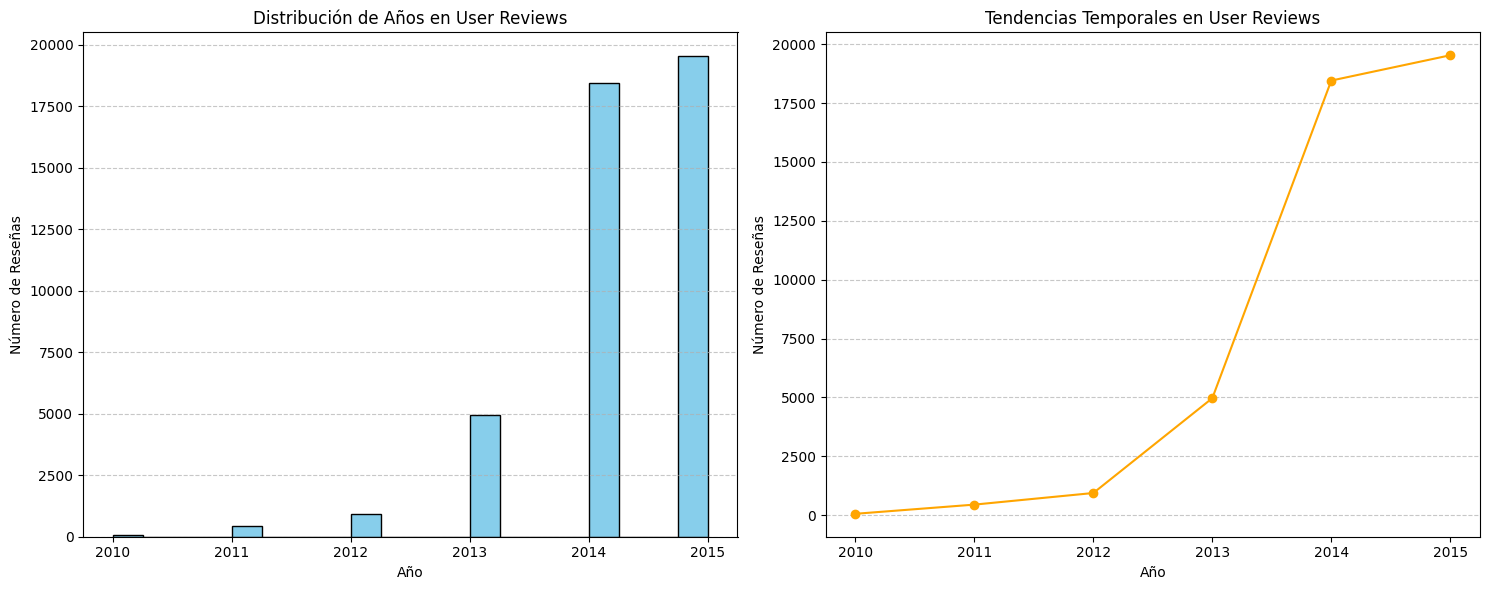

In [10]:
import matplotlib.pyplot as plt

# Crear subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 6))

# Histograma de la distribución de años
axs[0].hist(df_user_reviews['year'], bins=20, color='skyblue', edgecolor='black')
axs[0].set_title('Distribución de Años en User Reviews')
axs[0].set_xlabel('Año')
axs[0].set_ylabel('Número de Reseñas')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico de líneas para mostrar tendencias temporales
trends = df_user_reviews['year'].value_counts().sort_index()
axs[1].plot(trends.index, trends.values, marker='o', linestyle='-', color='orange')
axs[1].set_title('Tendencias Temporales en User Reviews')
axs[1].set_xlabel('Año')
axs[1].set_ylabel('Número de Reseñas')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

# Ajustar el diseño
plt.tight_layout()

# Mostrar los gráficos
plt.show()

La relación entre la distribución de años y la tendencia temporal confirma que, aunque hay un aumento general en las reseñas a lo largo del tiempo, hay años específicos que contribuyen de manera significativa a este crecimiento.

Se puede observar un gran crecimiento de reviews entre el año 2013 y el año 2014, esto puede traducisrse en un aumento en la utilizacion de la plataforma steam debido a lanzamientos de grandes juegos AAA (GTA V, Farcry 4, Titanfall, etc) y el creciente interes por la industria.


In [11]:
# Calcula valores en la columna 'recommend' 
conteo_por_recomendaciones = df_user_reviews['recommend'].value_counts()
porcentaje_recomendaciones = df_user_reviews['recommend'].value_counts(normalize=True) * 100
#porcentaje_recomendaciones = porcentaje_recomendaciones.round(2).astype(str) + '%'

# Crear un nuevo DataFrame con el conteo y porcentaje
resumen_recomendaciones = pd.DataFrame({
    'Conteo': conteo_por_recomendaciones,
    'Porcentaje': porcentaje_recomendaciones.round(2).astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_recomendaciones = resumen_recomendaciones.sort_values(by='Conteo', ascending=False)

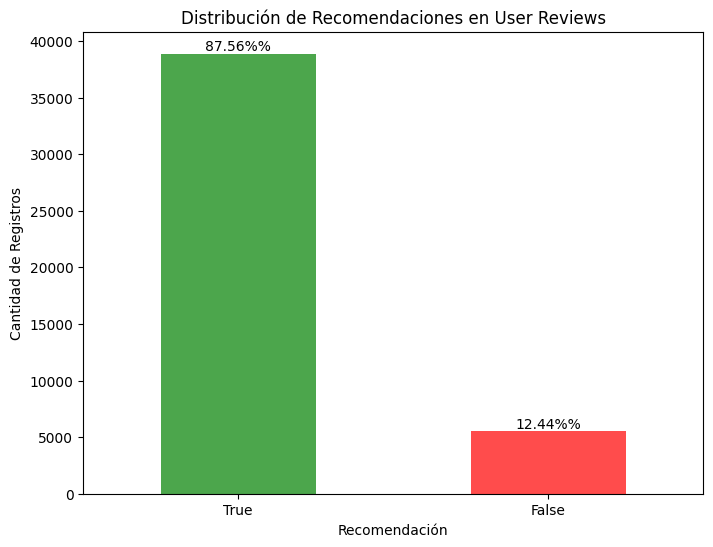

In [12]:
# Crear un gráfico de barras para visualizar las recomendaciones
plt.figure(figsize=(8, 6))
bars = resumen_recomendaciones['Conteo'].plot(kind='bar', color=['green', 'red'], alpha=0.7)
plt.title('Distribución de Recomendaciones en User Reviews')
plt.xlabel('Recomendación')
plt.ylabel('Cantidad de Registros')

# Agregar etiquetas con el porcentaje a cada barra
for bar, percentage in zip(bars.patches, resumen_recomendaciones['Porcentaje']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage}%', ha='center', va='bottom')

plt.xticks(rotation=0)
plt.show()

Se puede observar un desbalance en las recomendaciones, donde los usuarios tienden a hacer mas recomendaciones positivas (87.56%) que negativas (12.44%).

Se podría considerar a mayor profundidad para conocer realmente si esto refleja la naturaleza de las reseñas de usuarios en la plataforma ó si hay sesgos en la recopilación de datos.

# Variable **sentiment_analysis** (categorica)

Esta columna es un Feature Engineering. Es una nueva característica que fue creada con el objetivo de mejorar el rendimiento del futuro modelo de Machine Learning a partir de la columna 'reviews' que estaba presente en el conjunto de datos inicial e incluía reseñas de juegos hechos por distintos usuarios.

Antes de aplicar el análisis de sentimiento se evaluó la columna 'review' para obtener estadísticas sobre la cantidad de reseñas por lenguaje. Este análisis era crucial para determinar si el proceso de análisis de sentimientos se realizaría en todo el conjunto de datos ó si se aplicaría un filtro específico por idioma.

In [19]:
#Biblioteca para crear nubes de palabras en Python
from wordcloud import WordCloud 

In [21]:
df_idiomas =  pd.read_parquet('C:\\Users\\Juampi\\Desktop\\Henry\\PI_MLOps\\Datasets\\archivos_procesados\\resumen_idiomas.parquet')

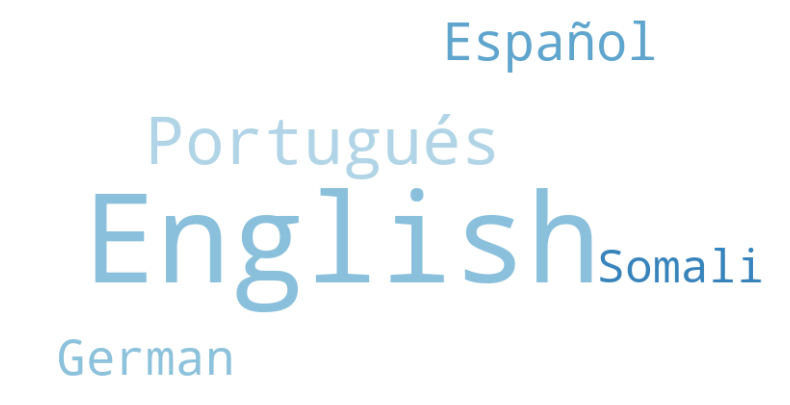

In [32]:
# Crear un diccionario con los datos del DataFrame
df_idiomas_dict = dict(zip(df_idiomas['Idioma'], df_idiomas['Conteo']))

# Crear la nube de palabras con colores personalizados
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='RdBu').generate_from_frequencies(df_idiomas_dict)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Con los resultados obtenidos consideré realizar el análisis de sentimiento solo en los registros en inglés, ya que constituyen una parte significativa del conjunto de datos (más del 70%). En el ETL se borraron los reviews que no estuvieran en inglés.

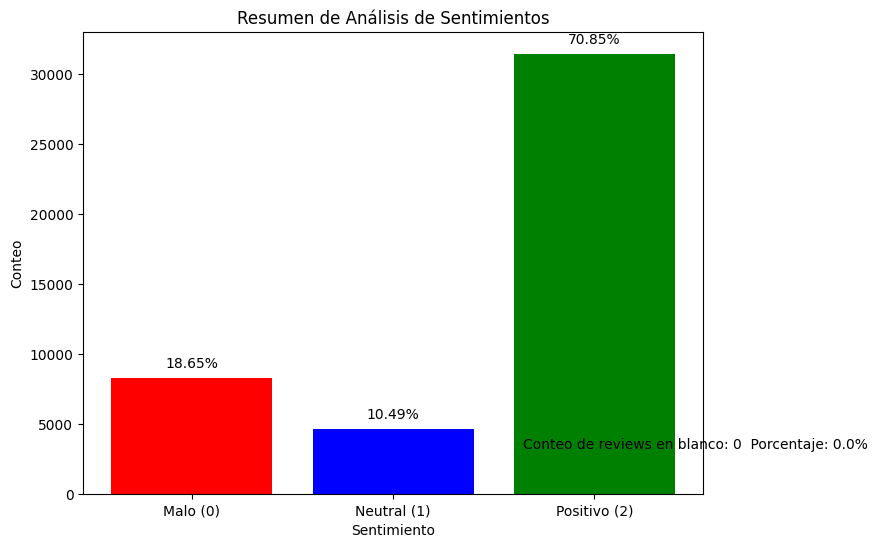

In [34]:
# Calcular el resumen de análisis de sentimientos

sentiment_summary = df_user_reviews['sentiment_analysis'].value_counts()
percentage_summary = (df_user_reviews['sentiment_analysis'].value_counts(normalize=True) * 100).round(2)

# Crear un nuevo DataFrame con el resumen
resumen_sentimientos = pd.DataFrame({
    'Conteo': sentiment_summary,
    'Porcentaje': percentage_summary.astype(str) + '%'
})

# Ordenar el DataFrame por el conteo de mayor a menor
resumen_sentimientos = resumen_sentimientos.sort_index()

# Visualizar el resumen
fig, ax = plt.subplots(figsize=(8, 6))

# Crear barras para el conteo
ax.bar(resumen_sentimientos.index, resumen_sentimientos['Conteo'], color=['red', 'blue', 'green'])

# Mostrar porcentajes encima de las barras
for i, v in enumerate(resumen_sentimientos['Porcentaje']):
    ax.text(i, resumen_sentimientos['Conteo'][i] + 500, f"{v}", ha='center', va='bottom')

# Configurar el gráfico
ax.set_title('Resumen de Análisis de Sentimientos')
ax.set_xlabel('Sentimiento')
ax.set_ylabel('Conteo')
ax.set_xticks(resumen_sentimientos.index)
ax.set_xticklabels(['Malo (0)', 'Neutral (1)', 'Positivo (2)'])

# Mostrar el conteo de reviews en blanco
conteo_reviews_en_blanco = (df_user_reviews['sentiment_analysis'].isnull()).sum()
porcentaje_reviews_en_blanco = (conteo_reviews_en_blanco / len(df_user_reviews) * 100).round(2)
ax.text(2.5, 3000, f"Conteo de reviews en blanco: {conteo_reviews_en_blanco}  Porcentaje: {porcentaje_reviews_en_blanco}%", ha='center', va='bottom')

plt.show()

En el análisis de sentimientos de las reseñas en la columna 'sentiment_analysis', se observa que la gran mayoria de las reviews son positivas (2) con poco mas del 70%. La categoría de sentimiento negativo (0) tiene una presencia mucho más baja constituyendo el 18%, estando mas cerca de las neutrales (1) que de las positivas. esto indica que en general, la plataforma tiene una inclinación positiva en las reseñas de los usuarios.